In [1]:
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/alura-cursos/numpy/dados/apples_ts.csv'

In [3]:
# Carregando o arquivo CSV ignorando a primeira coluna (nomes das cidades)
dado = np.loadtxt(url, delimiter=',', usecols=np.arange(1,88,1))

In [4]:
# Transpondo o array (linhas viram colunas)
dado_transposto= dado. T

In [5]:
# Separando as colunas: primeira coluna são as datas (meses) e as próximas são os preços
datas = dado_transposto[:,0] # meses
precos = dado_transposto[:,1:6] #preços de 5 cidades

In [6]:
# Corrigindo vetor datas (1 a 87), pois temos 87 meses
datas = np.arange(1,88,1)

In [7]:
# Importando bibliotecas de gráficos
import matplotlib.pyplot as plt

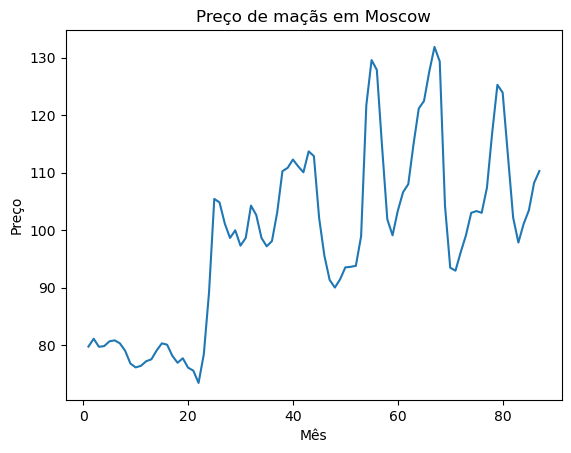

In [8]:
# Plotando preço de Moscow ao longo dos meses
plt.plot(datas, precos[:,0])
plt.title('Preço de maçãs em Moscow')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.show()

In [9]:
# Agora, organizamos os preços separadamente para cada cidade
Moscow = precos[:, 0]        # preços em Moscow
Kaliningrad = precos[:, 1]   # preços em Kaliningrad
Petersburg = precos[:, 2]    # preços em Petersburg
Krasnodar = precos[:, 3]     # preços em Krasnodar
Ekaterinburg = precos[:, 4]  # preços em Ekaterinburg

In [10]:
# Vamos analisar o comportamento de preços de Moscow ano a ano
# Como temos 87 meses, e 1 ano tem 12 meses, separamos 4 blocos de 12 meses
Moscow_ano1 = Moscow[0:12]
Moscow_ano2 = Moscow[12:24]
Moscow_ano3 = Moscow[24:36]
Moscow_ano4 = Moscow[36:48]

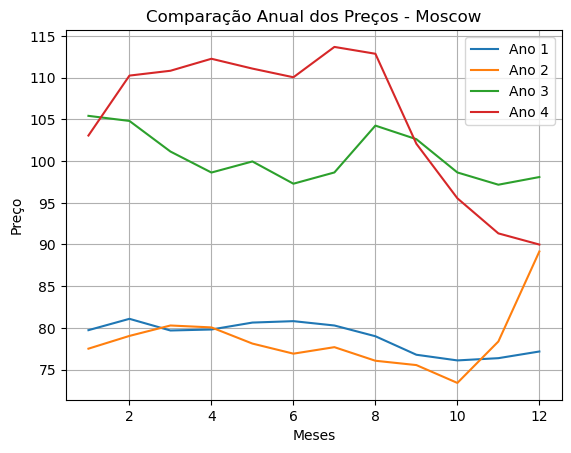

In [11]:
# Exibindo gráfico comparativo dos quatro anos de Moscow
plt.plot(np.arange(1, 13, 1), Moscow_ano1)
plt.plot(np.arange(1, 13, 1), Moscow_ano2)
plt.plot(np.arange(1, 13, 1), Moscow_ano3)
plt.plot(np.arange(1, 13, 1), Moscow_ano4)
plt.legend(['Ano 1', 'Ano 2', 'Ano 3', 'Ano 4'])
plt.title('Comparação Anual dos Preços - Moscow')
plt.xlabel('Meses')
plt.ylabel('Preço')
plt.grid()
plt.show()

In [12]:
# Verificando similaridade entre ano3 e ano4
np.allclose(Moscow_ano3, Moscow_ano4, atol=10)

False

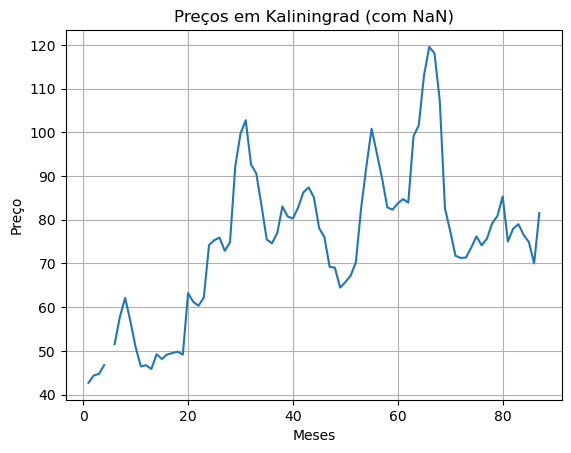

In [13]:
# Analisando gráfico de Kaliningrad (com NaN)
plt.plot(datas, Kaliningrad)
plt.title('Preços em Kaliningrad (com NaN)')
plt.xlabel('Meses')
plt.ylabel('Preço')
plt.grid()
plt.show()

In [14]:
# Quantidade de valores nulos em Kaliningrad
print('Valores nulos em Kaliningrad:', sum(np.isnan(Kaliningrad)))

Valores nulos em Kaliningrad: 1


In [15]:
# temos apenas um valor nulo no array
sum(np.isnan(Kaliningrad))

1

In [16]:
# Corrigindo o valor nulo (média dos vizinhos)
Kaliningrad[4] = np.mean([Kaliningrad[3], Kaliningrad[5]])

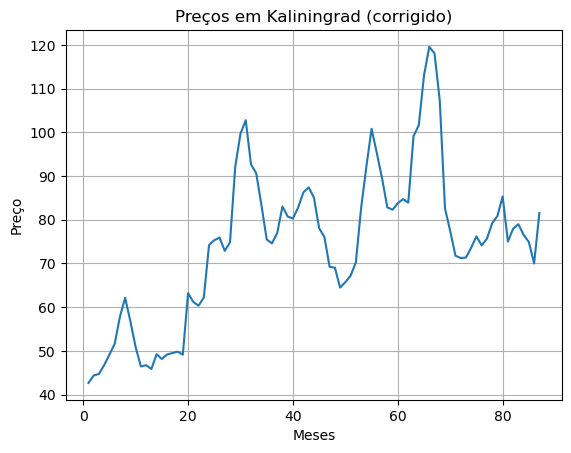

In [17]:
# Replotando Kaliningrad corrigido
plt.plot(datas, Kaliningrad)
plt.title('Preços em Kaliningrad (corrigido)')
plt.xlabel('Meses')
plt.ylabel('Preço')
plt.grid()
plt.show()

In [18]:
# Cálculo das médias
print('Média Moscow:', np.mean(Moscow))
print('Média Kaliningrad:', np.mean(Kaliningrad))

Média Moscow: 98.79781609195402
Média Kaliningrad: 74.5506896551724


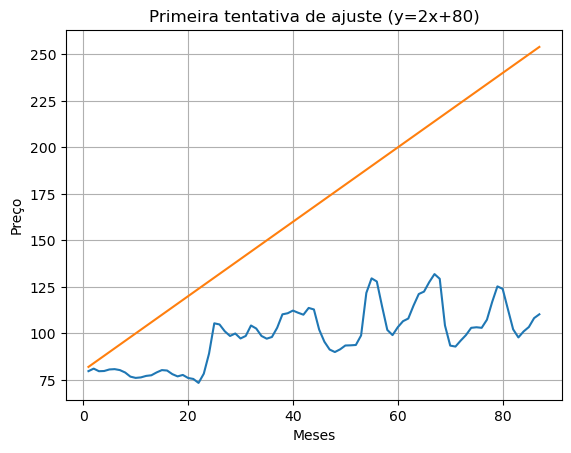

In [19]:
# Regressão inicial y = 2x + 80
x = datas
y = 2*x + 80

plt.plot(datas, Moscow)
plt.plot(x, y)
plt.title('Primeira tentativa de ajuste (y=2x+80)')
plt.xlabel('Meses')
plt.ylabel('Preço')
plt.grid()
plt.show()

In [20]:
# Erro quadrático entre Moscow e primeira linha ajustada
print('Erro inicial:', np.sqrt(np.sum(np.power(Moscow - y, 2))))

Erro inicial: 749.2329171225728


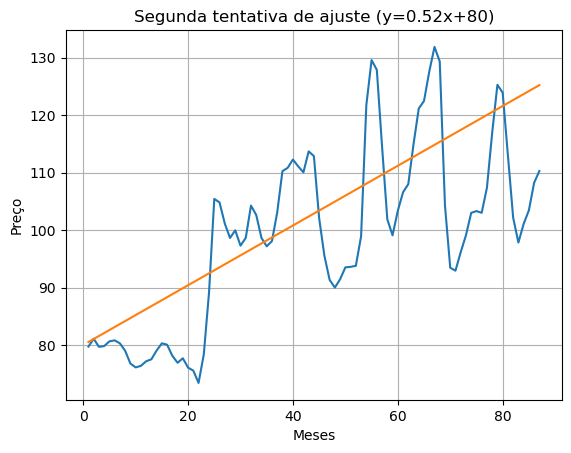

In [21]:
# Novo ajuste y = 0.52x + 80
y = 0.52*x + 80

plt.plot(datas, Moscow)
plt.plot(x, y)
plt.title('Segunda tentativa de ajuste (y=0.52x+80)')
plt.xlabel('Meses')
plt.ylabel('Preço')
plt.grid()
plt.show()

In [22]:
# Erro quadrático do novo ajuste
print('Erro novo ajuste:', np.sqrt(np.sum(np.power(Moscow - y, 2))))

Erro novo ajuste: 110.48504740461489


In [23]:
# Norma 2 do erro
print('Norma 2:', np.linalg.norm(Moscow - y))

Norma 2: 110.48504740461489


Norma 2 com ajuste correto: 101.79695399927512


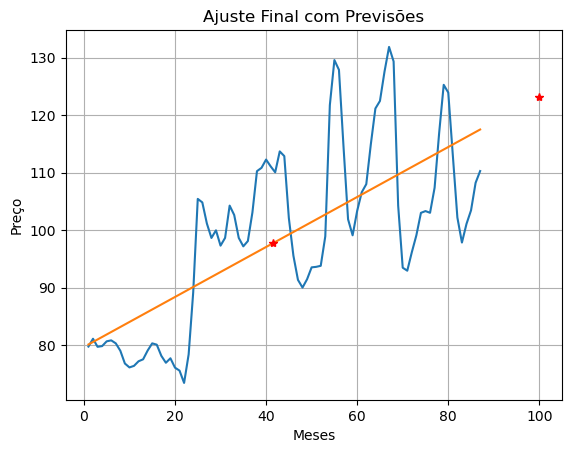

In [24]:
# Agora, vamos calcular a regressão linear correta
# Fórmulas:
# a = coeficiente angular (inclinação)
# b = coeficiente linear (intercepto)

Y = Moscow
X = datas
n = np.size(Moscow)

# Cálculo do coeficiente angular (a)
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y)) / (n*np.sum(X**2) - (np.sum(X))**2)

# Cálculo do coeficiente linear (b)
b = np.mean(Y) - a*np.mean(X)

# Agora sim, construindo a reta correta
y = a*X + b

# Calculando a norma 2 com essa linha correta
print('Norma 2 com ajuste correto:', np.linalg.norm(Moscow - y))

# Mostrando no gráfico o ajuste correto
plt.plot(datas, Moscow)
plt.plot(x, y)
plt.plot(41.5, 41.5*a + b, '*r') # Previsão para 41.5 meses
plt.plot(100, 100*a + b, '*r')   # Previsão para 100 meses
plt.title('Ajuste Final com Previsões')
plt.xlabel('Meses')
plt.ylabel('Preço')
plt.grid()
plt.show()


In [25]:
# Simulando coeficientes aleatórios para testar qual melhor se aproxima
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.10, high=0.90, size=100)

# Para cada coeficiente, calculamos o erro (norma 2)
norma2 = np.array([])
for i in range(100):
    y_simulado = coef_angulares[i]*X + b
    erro_simulado = np.linalg.norm(Moscow - y_simulado)
    norma2 = np.append(norma2, erro_simulado)

# Empilhando os dados: cada linha é [erro, coeficiente]
dados = np.column_stack([norma2, coef_angulares])


In [26]:
# Criando arrays extras
vetor_zeros = np.zeros(10)
vetor_uns = np.ones(10)
vetor_identidade = np.eye(5)
vetor_linspace = np.linspace(0, 100, 5)

print('Vetor de zeros:', vetor_zeros)
print('Vetor de uns:', vetor_uns)
print('Matriz identidade:', vetor_identidade)
print('Linspace:', vetor_linspace)

Vetor de zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Vetor de uns: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Matriz identidade: [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Linspace: [  0.  25.  50.  75. 100.]


In [27]:
# Slicing: preços dos meses pares
meses_pares = Moscow[1::2]
print('Preços nos meses pares:', meses_pares)

Preços nos meses pares: [ 81.08  79.8   80.8   78.99  76.09  77.16  79.03  80.05  76.9   76.05
  73.39  89.16 104.82  98.63  97.29 104.26  98.64  98.09 110.26 112.28
 110.06 112.88  95.54  89.99  93.51  93.78 121.76 127.9  101.88 103.35
 108.   121.17 127.58 129.36  93.45  96.15 103.   103.01 116.91 123.94
 102.19 101.07 108.23]


In [28]:
# Máscara booleana: meses onde preço > 200
mascara_precos_altos = Moscow > 100
print('Meses com preço acima de 100:', Moscow[mascara_precos_altos])

Meses com preço acima de 100: [105.43 104.82 101.15 104.26 102.63 103.07 110.26 110.84 112.28 111.1
 110.06 113.7  112.88 102.08 121.76 129.6  127.9  114.55 101.88 103.35
 106.58 108.   114.95 121.17 122.48 127.58 131.89 129.36 104.26 103.
 103.31 103.01 107.37 116.91 125.29 123.94 113.03 102.19 101.07 103.44
 108.23 110.28]


In [29]:
# Reshape: transformando vetor em matriz 3D (só para treinamento)
Moscow_reshape = Moscow[:36].reshape(3, 4, 3)  # 3 "anos", 4 "trimestres", 3 "meses"
print('Moscow reshape (3x4x3):\n', Moscow_reshape)

Moscow reshape (3x4x3):
 [[[ 79.72  81.08  79.68]
  [ 79.8   80.63  80.8 ]
  [ 80.28  78.99  76.77]
  [ 76.09  76.36  77.16]]

 [[ 77.5   79.03  80.28]
  [ 80.05  78.11  76.9 ]
  [ 77.68  76.05  75.53]
  [ 73.39  78.36  89.16]]

 [[105.43 104.82 101.15]
  [ 98.63  99.96  97.29]
  [ 98.64 104.26 102.63]
  [ 98.64  97.17  98.09]]]


In [30]:
# Operações vetorizadas: simulando inflação de 5%
Moscow_inflacao = Moscow * 1.05
print('Moscow com inflação simulada:', Moscow_inflacao)

Moscow com inflação simulada: [ 83.706   85.134   83.664   83.79    84.6615  84.84    84.294   82.9395
  80.6085  79.8945  80.178   81.018   81.375   82.9815  84.294   84.0525
  82.0155  80.745   81.564   79.8525  79.3065  77.0595  82.278   93.618
 110.7015 110.061  106.2075 103.5615 104.958  102.1545 103.572  109.473
 107.7615 103.572  102.0285 102.9945 108.2235 115.773  116.382  117.894
 116.655  115.563  119.385  118.524  107.184  100.317   95.8965  94.4895
  96.012   98.1855  98.28    98.469  103.8555 127.848  136.08   134.295
 120.2775 106.974  104.0445 108.5175 111.909  113.4    120.6975 127.2285
 128.604  133.959  138.4845 135.828  109.473   98.1225  97.5765 100.9575
 104.055  108.15   108.4755 108.1605 112.7385 122.7555 131.5545 130.137
 118.6815 107.2995 102.7215 106.1235 108.612  113.6415 115.794 ]


In [31]:
# Cálculo de desvio padrão
print('Desvio padrão dos preços em Moscow:', np.std(Moscow))

Desvio padrão dos preços em Moscow: 15.445368194990415


In [32]:
# Criando um array manualmente com np.array()
manual_array = np.array([10, 20, 30, 40, 50])
print('Array criado manualmente:', manual_array)

Array criado manualmente: [10 20 30 40 50]


In [33]:
# Convertendo o tipo para float
manual_array_float = manual_array.astype(float)
print('Array convertido para float:', manual_array_float)

Array convertido para float: [10. 20. 30. 40. 50.]


In [34]:
# Verificando as propriedades do array (shape e ndim)
print('Shape do array manual:', manual_array.shape)  # formato (5,)
print('Número de dimensões (ndim):', manual_array.ndim)  # 1 dimensão

Shape do array manual: (5,)
Número de dimensões (ndim): 1


In [35]:
# Boolean Indexing (filtrar valores maiores que 25)
filtro = manual_array[manual_array > 25]
print('Valores maiores que 25:', filtro)

Valores maiores que 25: [30 40 50]


In [36]:
# Verificando o tipo de dado do array (dtype)
print('Tipo de dado do array:', manual_array.dtype)

Tipo de dado do array: int32


In [37]:
# Cópia de array com copy()
array_copiado = manual_array.copy()
array_copiado[0] = 999  # alterando o primeiro valor da cópia

# Verificando que o original não foi alterado
print('Array original:', manual_array)
print('Array copiado (alterado):', array_copiado)

Array original: [10 20 30 40 50]
Array copiado (alterado): [999  20  30  40  50]


In [38]:
# Salvando o resultado no arquivo CSV
np.savetxt('dados.csv', dados, delimiter=',')

In [39]:
# Lendo novamente o arquivo salvo
dados_carregados = np.loadtxt('dados.csv', delimiter=',')

# Imprimindo o conteúdo lido
print('Conteúdo salvo no CSV:')
print(dados_carregados)

Conteúdo salvo no CSV:
[[1.73901512e+02 1.36832795e-01]
 [1.03452420e+02 3.96193853e-01]
 [1.21753673e+02 2.93854614e-01]
 [1.28971730e+02 6.02784004e-01]
 [2.38695041e+02 8.92088048e-01]
 [1.49165902e+02 2.04470439e-01]
 [1.37731232e+02 2.38871331e-01]
 [1.18544192e+02 3.06651246e-01]
 [1.01797210e+02 4.34719173e-01]
 [1.49046891e+02 2.04815115e-01]
 [1.12802252e+02 3.32360100e-01]
 [1.05804935e+02 4.96244876e-01]
 [2.30824447e+02 8.73603452e-01]
 [1.11697096e+02 3.37911891e-01]
 [1.34565256e+02 6.21441549e-01]
 [1.10932096e+02 5.28490318e-01]
 [2.04124844e+02 8.09621105e-01]
 [1.96821173e+02 7.91678598e-01]
 [2.21886877e+02 8.52426259e-01]
 [1.56136911e+02 1.84666511e-01]
 [1.25512722e+02 5.90577856e-01]
 [1.36464745e+02 2.42872649e-01]
 [1.65395063e+02 1.59341647e-01]
 [2.40687847e+02 8.96746192e-01]
 [1.04522545e+02 3.85019182e-01]
 [1.88756379e+02 7.71579591e-01]
 [1.31229293e+02 6.10457133e-01]
 [1.28948853e+02 2.67699096e-01]
 [2.34707736e+02 8.82741553e-01]
 [1.47017998e+02 2.1